In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
# creating dummy variables
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [6]:
# concatinating the dataset
X = pd.concat([X, geography, gender], axis=1)

In [7]:
# dropping the unnecessary columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [8]:
# splitting the dataset into the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Making of ANN

In [11]:
# importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [12]:
# initialising the ANN
classifier = Sequential()

In [13]:
# adding the input layer and the first hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# adding the second hidden layer
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))

In [15]:
# adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [16]:
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=10)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8631 - loss: 0.3150 - val_accuracy: 0.8519 - val_loss: 0.3653
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8784 - loss: 0.2947 - val_accuracy: 0.8516 - val_loss: 0.3652
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8693 - loss: 0.3013 - val_accuracy: 0.8535 - val_loss: 0.3645
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.2976 - val_accuracy: 0.8535 - val_loss: 0.3642
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3058 - val_accuracy: 0.8531 - val_loss: 0.3645
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8676 - loss: 0.3134 - val_accuracy: 0.8557 - val_loss: 0.3653
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8760 - loss: 0.2968 - val_accuracy: 0.8531 - val_loss: 0.3637
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8719 - loss: 0.3086 - val_accuracy: 0.

In [23]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,085 (4.24 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 724 (2.83 KB)

In [24]:
# list all the data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


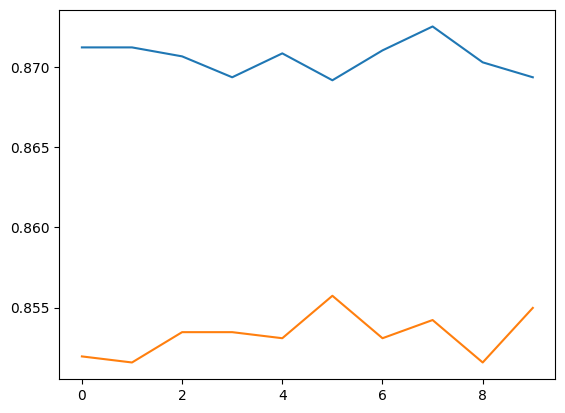

In [25]:
# summarize accuracy for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

# Making the Predictions and Evaluating the Model

In [31]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1519   76]
 [ 208  197]]


In [33]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.858
